In [ ]:
%pip install control
%pip install pygame

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control
import math

# Filtering
In the real world, our models and measurements of a system are almost never completely accurate. As a result, we often have to derive a "best" estimate of the true state of the system, based on all the information available. In most cases, we can base our estimate on two sources of information: Firstly, we might have an approximate model that predicts the current state of the system using the previous state. Secondly, we might use sensors to measure the current state. The uncertainties present in these estimates are known as disturbances and noises, respectively. An important task in filtering is to fuse these estimates in a way that appropriately balances the effect of different uncertainties.

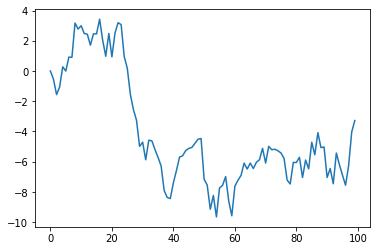

In [2]:
def walk_measurement(disturbance,noise):
    rwalk=[0]
    for i in range(99):
        rwalk.append(rwalk[-1]+np.random.normal(0,disturbance))
    measurement=[i+np.random.normal(0,noise) for i in rwalk]
    return rwalk,measurement
rwalk,measurement=walk_measurement(1,5)
plt.plot(rwalk)


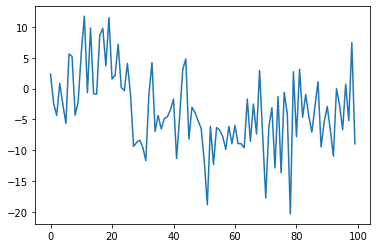

In [3]:
plt.plot(measurement)

0.3149821673336747


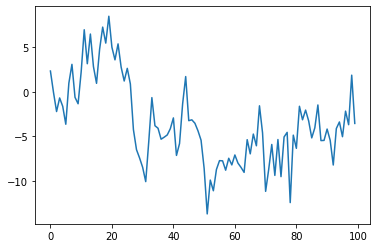

In [4]:
def filter(prediction,cur_measurement):
    w=0.5
    return prediction+w*(cur_measurement-prediction)
filtered=[measurement[0]]
for i in measurement[1:]:
    filtered.append(filter(filtered[-1],i))
plt.plot(filtered)
print(sum([(filtered[i]-rwalk[i])**2 for i in range(len(rwalk))])/sum([(measurement[i]-rwalk[i])**2 for i in range(len(rwalk))]))

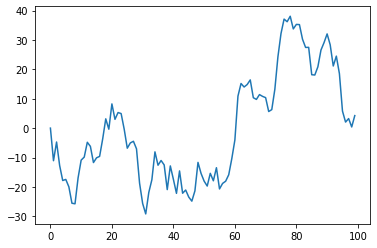

In [5]:
rwalk,measurement=walk_measurement(5,3)
plt.plot(rwalk)

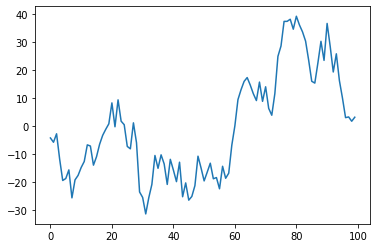

In [6]:
plt.plot(measurement)

0.8713928790749508


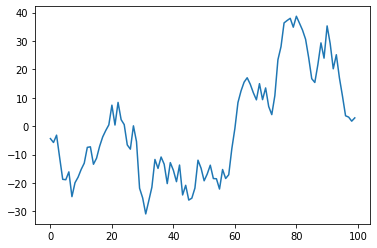

In [7]:
def filter2(prediction,cur_measurement):
    w=0.9
    return prediction+w*(cur_measurement-prediction)
filtered=[measurement[0]]
for i in measurement[1:]:
    filtered.append(filter2(filtered[-1],i))
plt.plot(filtered)
print(sum([(filtered[i]-rwalk[i])**2 for i in range(len(rwalk))])/sum([(measurement[i]-rwalk[i])**2 for i in range(len(rwalk))]))

# Alpha Beta filtering (TBC)

In [8]:
def aircraft(v_unc,x_unc):
    air=[0]
    v=2
    for i in range(99):
        air.append(air[-1]+v)
        v+=np.random.normal(0,v_unc)
    measure=[i+np.random.normal(0,x_unc) for i in air]
    return air, measure
def g_h_filter(data, v, g, h):
    x_est=data[0]
    filtered=[data[0]]
    for x in data[1:]:
        x_pred=x_est+v
        residual=x-x_pred
        v=v+h*(residual)
        x_est=x_pred+g*residual
        filtered.append(x_est)
    return filtered

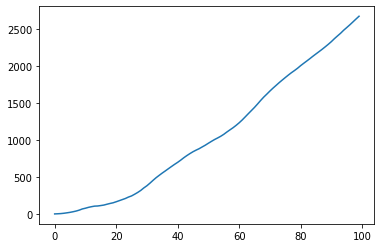

In [9]:
air,measure=aircraft(3,5)
filtered=g_h_filter(measure,2,0.6,0.9)
plt.plot(air)

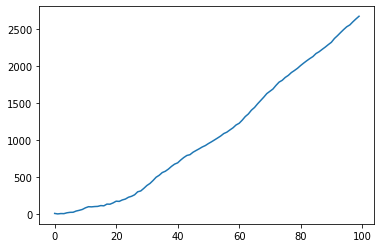

In [10]:
plt.plot(measure)

0.885852363041341


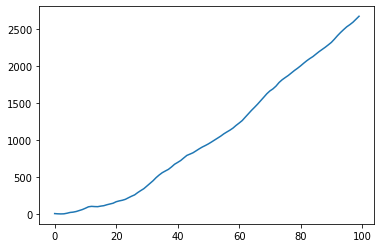

In [11]:
plt.plot(filtered)
print(sum([(filtered[i]-air[i])**2 for i in range(len(air))])/sum([(measure[i]-air[i])**2 for i in range(len(air))]))

## Inverted Pendulum

SystemExit: 

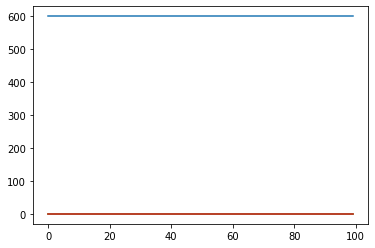

In [15]:
import pendulum
import pygame
import scipy
#x,x dot,theta, theta dot
WINDOWDIMS = (1200, 600)
CARTDIMS = (50, 10)
PENDULUMDIMS = (6, 200)
GRAVITY = 0.13
REFRESHFREQ = 100
A_CART = 0.15
inv = pendulum.InvertedPendulumGame(WINDOWDIMS, CARTDIMS, PENDULUMDIMS, GRAVITY, A_CART, REFRESHFREQ)
def updfcn(t,x,u,param):
    x_=np.array([0,0,0,0])
    x_[0]=x[1]
    x_[1]=u[0]
    x_[2]=x[3] + x[1] * np.cos(x[2]) / float(inv.pendulum.PENDULUMLENGTH)
    x_[3]=inv.pendulum.GRAVITY*np.sin(x[2])/float(inv.pendulum.PENDULUMLENGTH)
    return x

def cost(x,u):
    Q=np.array([0,0,0,0,0,1,0,0,0,0,100,0,0,0,0,10]).reshape(4,4)
    
    return x.T@Q@x+0.001*u**2
def integral(x,u):
    return 0

system=control.NonlinearIOSystem(updfcn,inputs=1,states=4)

x=np.array([inv.pendulum.WINDOWWIDTH / 2,0,np.random.uniform(-0.01,0.01),0])
constraint=(scipy.optimize.LinearConstraint,np.eye(4),np.array([inv.pendulum.CARTWIDTH / 2,-math.inf,-math.inf,-math.inf]),np.array([inv.pendulum.WINDOWWIDTH - inv.pendulum.CARTWIDTH / 2,math.inf,math.inf,math.inf]))
#ctrler=control.optimal.OptimalControlProblem(system,np.arange(0,6),integral,trajectory_constraints=[],terminal_cost=cost)
trajectory=[]
#print(ctrler.compute_mpc(x,squeeze=True))
for i in range(100):
    trajectory.append(x)
    x=system.dynamics(0,x,np.array([0]))

plt.plot(trajectory)
def controller(x):
    
    return 0
inv.game(controller)

In [ ]:
if x[0] <= inv.pendulum.CARTWIDTH / 2:
        x[0] = inv.pendulum.CARTWIDTH / 2
        x[1] = 0
elif x[0] >= inv.pendulum.WINDOWWIDTH - inv.pendulum.CARTWIDTH / 2:
    x[0] = inv.pendulum.WINDOWWIDTH - inv.pendulum.CARTWIDTH / 2
    x[1] = 0

In [18]:
A=np.array([0,0,1,0, 0,0,-0.1,0 ,0,0,0,1 ,0,0,1,0]).reshape(4,4)
B=np.array([0,1,0,-1]).reshape(4,1)
C=np.eye(4)
D=np.zeros((4,1))
system=control.StateSpace(A,B,C,D)
x=np.array([0,0,0,0.0001])
trajectory=[]
Q=np.array([100,0,0,0,0,10,0,0,0,0,1,0,0,0,0,10]).reshape(4,4)
R=np.array([0.001])
K,S,E=control.lqr(system,Q,R)
system=control.ss2io(system)
#K=control.place(A,B,np.array([0.2,0.1,0.001,0.01]))
for i in range(100):
    trajectory.append(x)
    x=system.dynamics(0,x,K.dot(x))
trajectory=np.array(trajectory)
plt.plot(trajectory[:,2])

LinAlgError: Failed to find a finite solution.